In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, model_selection
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from sklearn.datasets import make_blobs, make_classification, make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

## Basic scatter plot

This method of plotting only uses numpy

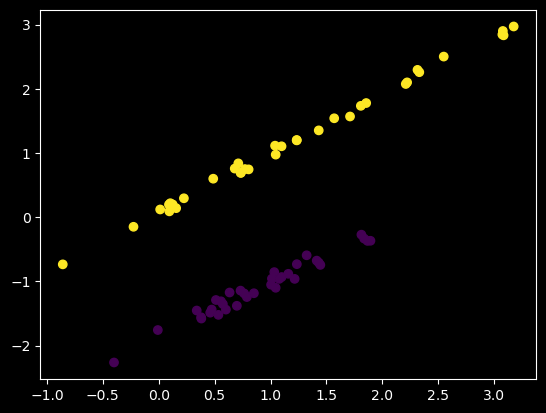

In [3]:
plt.scatter(x=X_train[: ,0], y=X_train[:, 1], c=y_train)


## Pandas scatter plot

This method of plotting uses pandas to create a dataframe and then plots it

<Axes: xlabel='feature_1', ylabel='feature_2'>

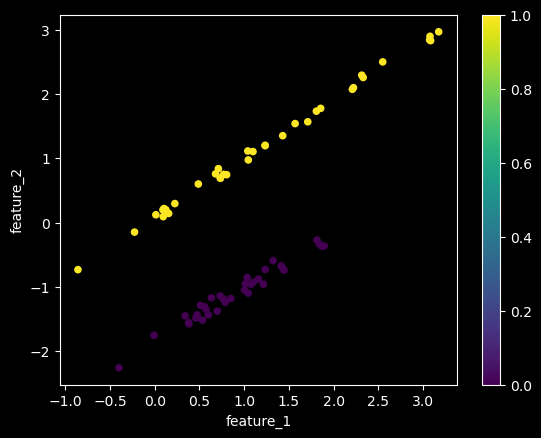

In [4]:
X_train_df = pd.DataFrame(X_train, columns=['feature_1', 'feature_2'])
X_train_df.plot.scatter(x='feature_1', y='feature_2', c=y_train, cmap='viridis')

## Computing correlation coefficient with numpy

Correlation coefficient between feature 1 and feature 2: 0.6893


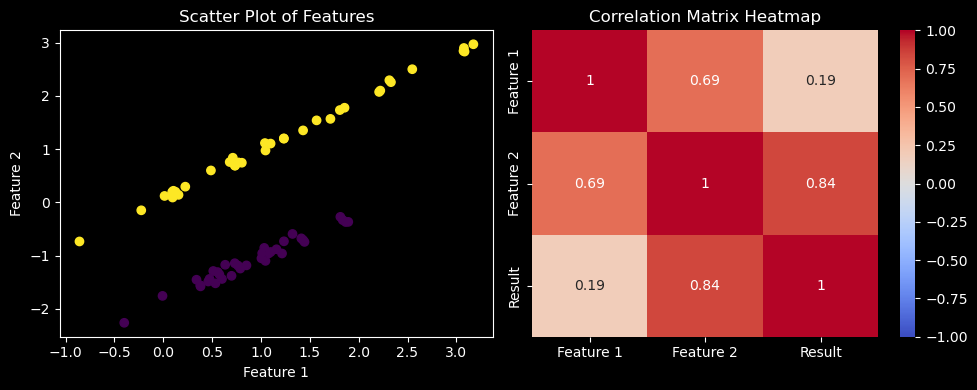

In [5]:
# Calculate correlation coefficient
corr_coef = np.corrcoef(X_train.T)[0, 1]

print(f"Correlation coefficient between feature 1 and feature 2: {corr_coef:.4f}")

# Visualize the correlation
plt.figure(figsize=(10, 4))

# Scatter plot
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.title('Scatter Plot of Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Heatmap of correlation matrix
plt.subplot(122)
corr_matrix = np.corrcoef(np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1).T)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            xticklabels=['Feature 1', 'Feature 2', 'Result'],
            yticklabels=['Feature 1', 'Feature 2', 'Result'])
plt.title('Correlation Matrix Heatmap')

plt.tight_layout()
plt.show()


## Computing correlation coefficient with pandas

Correlation coefficient between Feature 1 and Feature 2: 0.6893


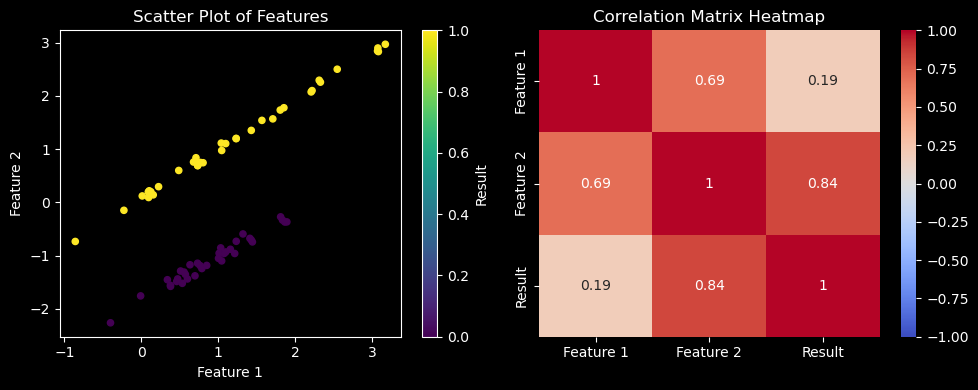

In [6]:
# Create a DataFrame with features and target
df = pd.DataFrame(np.column_stack((X_train, y_train)), columns=['Feature 1', 'Feature 2', 'Result'])

# Calculate correlation coefficient
corr_coef = df['Feature 1'].corr(df['Feature 2'])

print(f"Correlation coefficient between Feature 1 and Feature 2: {corr_coef:.4f}")

# Visualize the correlation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Scatter plot
df.plot.scatter(x='Feature 1', y='Feature 2', c='Result', cmap='viridis', ax=ax1)
ax1.set_title('Scatter Plot of Features')

# Heatmap of correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax2)
ax2.set_title('Correlation Matrix Heatmap')

plt.tight_layout()
plt.show()


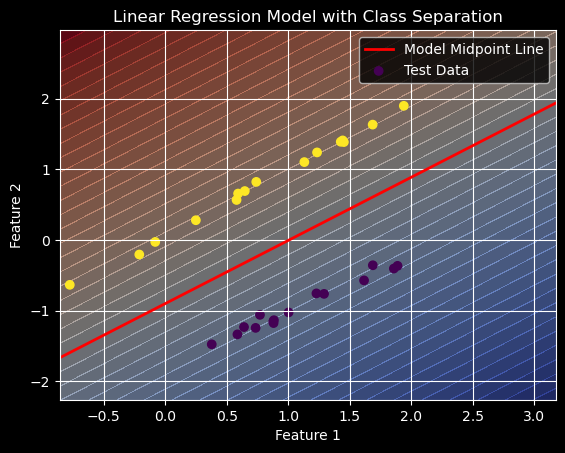

Mean squared error: 0.00
Coefficient of determination: 1.00


In [7]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Create a grid of values for the x-axis and y-axis
x1_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
x2_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
X_grid = np.array(np.meshgrid(x1_range, x2_range)).T.reshape(-1, 2)

# Predict the corresponding y values using the linear regression model
y_grid = model.predict(X_grid)

# Reshape predictions for plotting
y_pred_reshaped = y_grid.reshape(100, 100).T

# Plot the regression contour
plt.contourf(x1_range, x2_range, y_pred_reshaped, levels=50, cmap='coolwarm', alpha=0.5)

# Plot the midppoint line of the regression model
x2_midpoint_line = (0.5 - (model.intercept_ + model.coef_[0] * x1_range)) / model.coef_[1]
plt.plot(x1_range, x2_midpoint_line, color='red', linewidth=2, label='Model Midpoint Line')

# Predict the corresponding y values using the linear regression model
y_pred = model.predict(X_test)

# Plot the test data
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_test, cmap='viridis', label='Test Data')

# Add labels and legend
plt.title('Linear Regression Model with Class Separation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
